<a href="https://colab.research.google.com/github/mwbest/MBestWeb/blob/main/n6569_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install isochrones

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 4.5 MB 32.2 MB/s 
     |████████████████████████████████| 832 kB 47.6 MB/s 
     |████████████████████████████████| 48 kB 4.5 MB/s 
     |████████████████████████████████| 4.1 MB 37.3 MB/s 
  Created wheel for isochrones: filename=isochrones-2.1-py3-none-any.whl size=93781 sha256=71629c64c0fc1db0452cfc3d1572cbc595f4b8093c64e3fb10b76fa0087145c6
  Stored in directory: /root/.cache/pip/wheels/06/a3/0b/590c2fab4d7e7bdb40428104b54d99f3d0aa4a78e4a8ad7f85
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=cf263bceefd55e93b6c04a2c468adfc1a176543547dcf03d5ca53dd4bcaa025f
  Stored in directory: /root/.cache/pip/wheels/12/1c/38/0def51e15add93bff3f4bf9c248b94db0839b980b8535e72a0
  Created wheel for configobj: fil

In [3]:
from google.colab import files as colabfiles
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii,fits
from astropy.table import Table,MaskedColumn
from isochrones.mist import MIST_Isochrone

In [4]:
# Uploading files from local file system

uploaded = colabfiles.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving n6569wk_rv.csv to n6569wk_rv.csv
User uploaded file "n6569wk_rv.csv" with length 106806 bytes


In [5]:
import pandas as pd

dat = pd.read_csv('n6569wk_rv.csv')

# dat.columns
len(dat)

303

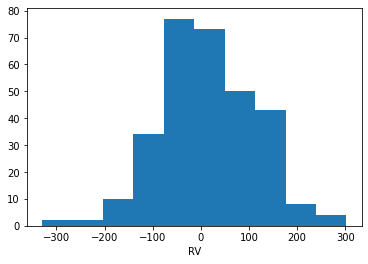

In [6]:
plt.hist(dat['RV'])
plt.xlabel('RV')
plt.show()

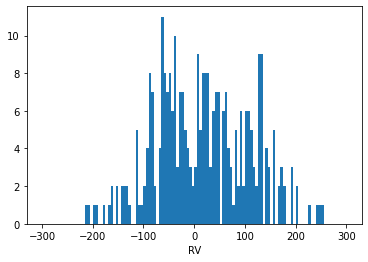

In [7]:
plt.hist(dat['RV'], bins=np.arange(-300, 300 + 5.0, 5.0))
plt.xlabel('RV')
plt.show()

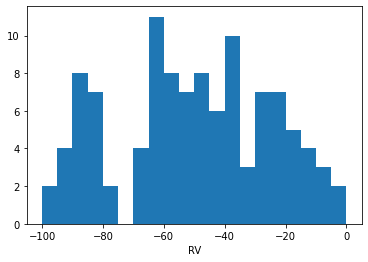

In [8]:
plt.hist(dat['RV'], bins=np.arange(-100, 0 + 5.0,5.0))
plt.xlabel('RV')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


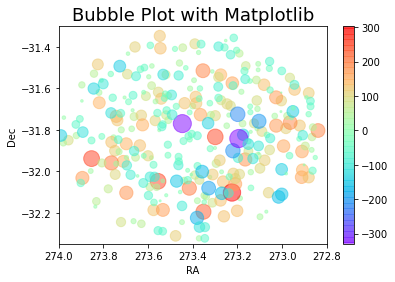

In [9]:
# Make data.
X = dat['radeg']
Y = dat['decdeg']
Z = dat['RV']
# Plot the surface.
colors =np.array(Z)
area=Z
plt.scatter(X,Y, s=5, sizes=area, alpha=0.5, c=colors, cmap='rainbow')
area = Z * (-1)
plt.xlim(274.0,272.8)
plt.ylim(-32.35,-31.3)

plt.scatter(X,Y, s=5, sizes=area, alpha=0.5, c=colors, cmap='rainbow')
         
plt.title("Bubble Plot with Matplotlib", size=18)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.colorbar()

plt.show()

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

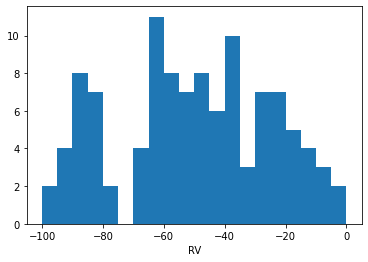

In [11]:
plt.hist(dat['RV'], bins=np.arange(-100, 0 + 5.0,5.0))
plt.xlabel('RV')
plt.show()

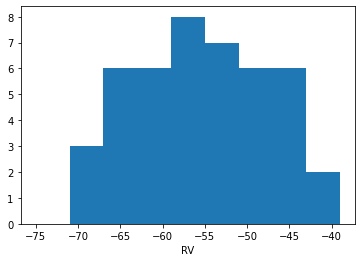

In [12]:
plt.hist(dat['RV'], bins=np.arange(-75, -40 + 4.0,4.0))
plt.xlabel('RV')
plt.show()

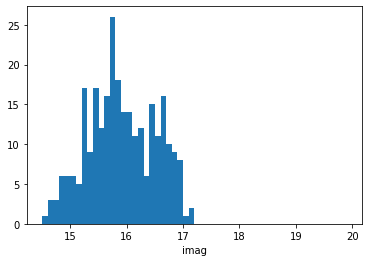

15.773
(array([ 0,  0,  0,  1,  0,  0,  1,  3,  0,  0,  1,  0,  2,  1,  2,  1,  2,
        4,  3,  3,  3,  3,  3,  2,  6, 11,  2,  7,  7, 10,  4,  8, 10,  6,
       12, 14,  9,  9,  6,  8,  6,  8,  8,  3,  5,  7,  3,  5,  4,  9,  9,
        2,  5, 11,  6,  4,  4,  5,  5,  3,  0]), array([14.  , 14.05, 14.1 , 14.15, 14.2 , 14.25, 14.3 , 14.35, 14.4 ,
       14.45, 14.5 , 14.55, 14.6 , 14.65, 14.7 , 14.75, 14.8 , 14.85,
       14.9 , 14.95, 15.  , 15.05, 15.1 , 15.15, 15.2 , 15.25, 15.3 ,
       15.35, 15.4 , 15.45, 15.5 , 15.55, 15.6 , 15.65, 15.7 , 15.75,
       15.8 , 15.85, 15.9 , 15.95, 16.  , 16.05, 16.1 , 16.15, 16.2 ,
       16.25, 16.3 , 16.35, 16.4 , 16.45, 16.5 , 16.55, 16.6 , 16.65,
       16.7 , 16.75, 16.8 , 16.85, 16.9 , 16.95, 17.  , 17.05]))


In [13]:
plt.hist(dat['imag'], bins=np.arange(14.5, 20, 0.1))
plt.xlabel('imag')
plt.show()
magi=dat['imag']
magi=np.median(magi)
print(magi)

mod=np.histogram(dat['imag'], bins=np.arange(14, 17.05, 0.05))

print(mod)

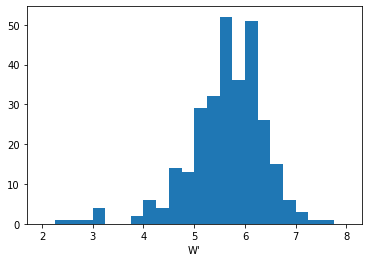

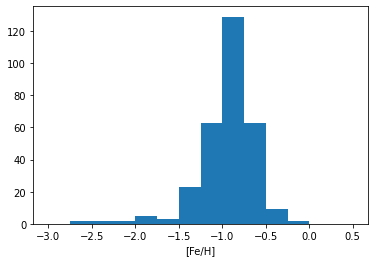

5.583241450324093 0.9236417774756225 5.698419999999999
-0.9448665949826787 0.33435832344617533 -0.9031719600000008
303


In [14]:



W3 = (0.5 * dat['CaT1']) + (1.0 * dat['CaT2']) + (0.6 * dat['CaT3']) 
W2 = (1.0 * dat['CaT2']) + (1.0 * dat['CaT3'])
W1= (1.0 * dat['CaT2'])
Wdash = W2 + 1.26 #Should be equivalent to W3 

Wd = Wdash + 0.62*(dat['imag']-16.587)#Changed
FeH = -2.966 + (0.362*Wd)
#Dias & Parisi A&A 642, A197 (2020)
FeHRR = -3.846 +0.004*W1
newfeh = FeH[dat['CaT2'] == 'n']
newfeh = FeHRR[dat['CaT2'] == 'RR']
#print(SEW,FeH)
plt.hist(Wd, bins=np.arange(2, 8 + 0.25,0.25))
plt.xlabel("W'")
plt.show()

plt.hist(FeH, bins=np.arange(-3, 0.5 + 0.25,0.25))
plt.xlabel("[Fe/H]")
plt.show()

av=np.mean(Wd)
sig=np.std(Wd)
med=np.median(Wd)
print(av,sig,med)

av=np.mean(FeH)
sig=np.std(FeH)
med=np.median(FeH)
print(av,sig,med)
num=len(Z)
print(num)



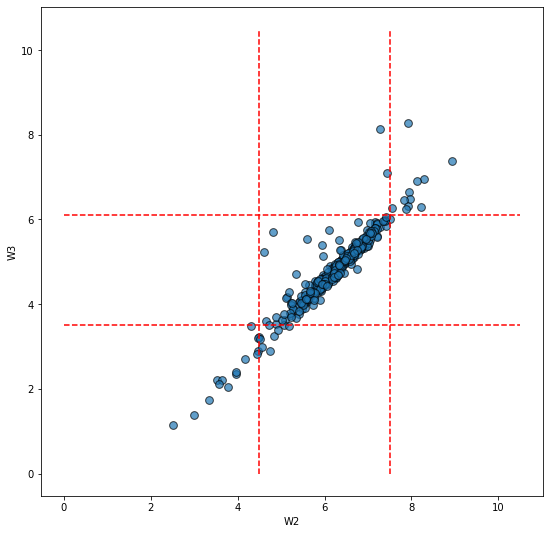

In [15]:
# Initialize layout
x = Wdash
y = W3

fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")


# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)
ax.set_xlabel('W2')
ax.set_ylabel('W3')
# Plot regression line
ax.vlines([4.5,7.5], 0, 10.5, linestyles='dashed', colors='red')
ax.hlines([3.5,6.1], 0, 10.5, linestyles='dashed', colors='red')
#




   


Mean              stdev           median


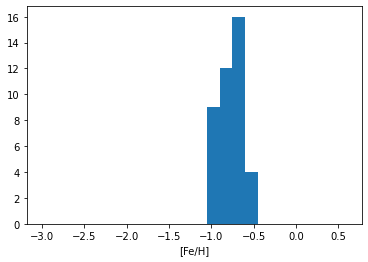

-0.7662049336585369 0.11746726849622043 -0.7613548400000005


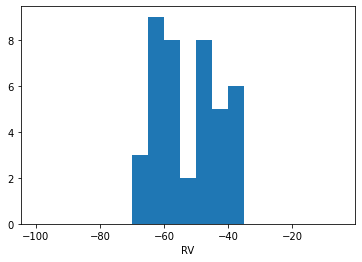

-52.36385649658537 9.506345599919062 -52.51986617


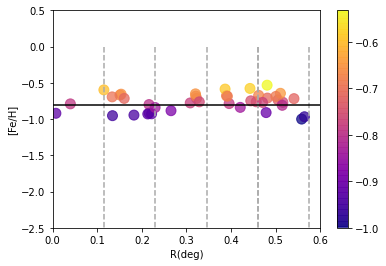

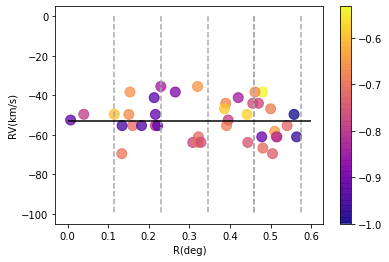

41


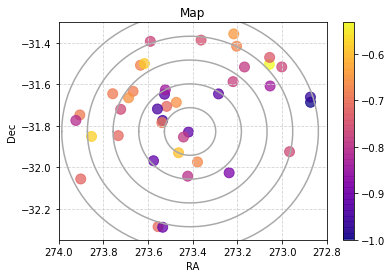

41


Text(0, 0.5, 'Dec')

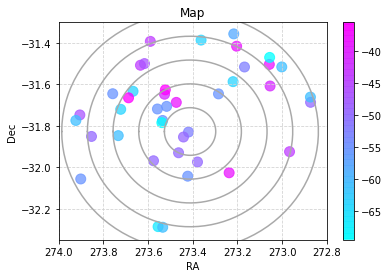

In [16]:
print("Mean","             stdev","          median")
X = dat['radeg']
Y = dat['decdeg']
Z = dat['RV']
#fehx = dat['[Fe/H]CaT']
#fehx = FeH
newrv = Z[(Z > -75) & (Z < -35)]
fehx = FeH[(FeH> -1.05) & (FeH < -0.5)&(Z > -75) & (Z < -35)]
newfeh = fehx


newrv=Z[(FeH> -1.05) & (FeH < -0.5) & (Z > -75) & (Z < -35)]
#print(SEW,FeH)
newW=Z[(FeH> -1.05) & (FeH < -0.5) & (Z > -75) & (Z < -35)]


plt.hist(newfeh, bins=np.arange(-3, 0.5 + 0.15,0.15))
plt.xlabel("[Fe/H]")
plt.show()

av=np.mean(newfeh)
sig=np.std(newfeh)
med=np.median(newfeh)
print(av,sig,med)

plt.hist(newrv, bins=np.arange(-100, 0,5))
plt.xlabel("RV")
plt.show()

av=np.mean(newrv)
sig=np.std(newrv)
med=np.median(newrv)
print(av,sig,med)




rx=X-273.412
ry=Y+31.827
rad=np.sqrt(rx**2+ry**2)
colors =np.array(Z)
area = newfeh*(-1)

plt.xlim(0,0.6)
plt.ylim(-2.5,0.5)



X = X[(FeH> -1.05) & (FeH < -0.5) & (Z > -75) & (Z < -35)]
Y = Y[(FeH> -1.05) & (FeH < -0.5) & (Z > -75) & (Z < -35)]
Z = fehx[(fehx> -1.05) & (fehx < -0.5)&(newrv > -75) & (newrv < -35)]

rx=X-273.412
ry=Y+31.827
rad=np.sqrt(rx**2+ry**2)
colors =np.array(Z)
area = Z * (-1)
#plt.scatter(rad,Z, s=1, sizes=area, alpha=0.5,  cmap='rainbow')
# Plot the surface.
colors =np.array(fehx)
area = fehx * (-1) *100
Rt= 0.115

plt.scatter(rad,Z, s=100,  alpha=0.75, c=colors, cmap='plasma')
plt.colorbar(orientation="vertical")
plt.vlines([0.115,2*0.115, 3*0.115,4*0.115,4*0.115,5*0.115], 0,-100, linestyles='dashed', colors='darkgray')
plt.hlines([-0.8], 0,0.6, colors='black')
plt.xlabel('R(deg)')
plt.ylabel('[Fe/H]')

plt.show()

plt.scatter(rad,newrv, s=100,  alpha=0.75, c=colors, cmap='plasma')
plt.colorbar(orientation="vertical")
plt.vlines([0.115,2*0.115, 3*0.115,4*0.115,4*0.115,5*0.115], 0,-100, linestyles='dashed', colors='darkgray')
plt.hlines([-53], 0,0.6, colors='black')
plt.xlabel('R(deg)')
plt.ylabel('RV(km/s)')

plt.show()

num=len(Z)
print(num)
# Plot the surface.
colors =np.array(Z)
area = newfeh * (-1)
plt.xlim(274.0,272.8)
plt.ylim(-32.35,-31.3)
colors =np.array(Z)
area = Z * (-1)
plt.scatter(X,Y, s=100,  alpha=0.75, c=colors, cmap='plasma')
plt.colorbar()
from math import pi

u=273.412     #x-position of the center
v=-31.827    #y-position of the center
a=0.115     #radius on the x-axis
b=0.115    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t), color='darkgray' )
plt.plot( u+2*a*np.cos(t) , v+2*b*np.sin(t), color='darkgray' )
plt.plot( u+3*a*np.cos(t) , v+3*b*np.sin(t), color='darkgray' )
plt.plot( u+4*a*np.cos(t) , v+4*b*np.sin(t), color='darkgray' )
plt.plot( u+5*a*np.cos(t) , v+5*b*np.sin(t), color='darkgray' )

plt.grid(color='lightgray',linestyle='--')
plt.title("Map")
plt.xlabel('RA')
plt.ylabel('Dec')


plt.show()
num=len(Z)
print(num)

colors =np.array(Z)
area = newfeh * (-1)
plt.xlim(274.0,272.8)
plt.ylim(-32.35,-31.3)
colors =np.array(newrv)
area = newrv * (-1)
plt.scatter(X,Y, s=100,  alpha=0.75, c=colors, cmap='cool')
plt.colorbar()
from math import pi

u=273.412     #x-position of the center
v=-31.827    #y-position of the center
a=0.115     #radius on the x-axis
b=0.115    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t), color='darkgray' )
plt.plot( u+2*a*np.cos(t) , v+2*b*np.sin(t), color='darkgray' )
plt.plot( u+3*a*np.cos(t) , v+3*b*np.sin(t), color='darkgray' )
plt.plot( u+4*a*np.cos(t) , v+4*b*np.sin(t), color='darkgray' )
plt.plot( u+5*a*np.cos(t) , v+5*b*np.sin(t), color='darkgray' )

plt.grid(color='lightgray',linestyle='--')
plt.title("Map")
plt.xlabel('RA')
plt.ylabel('Dec')


